In [1]:
from pathlib import Path

import matplotlib.pyplot as plt
import polars as pl
import polars.selectors as cs
import json
from pprint import pprint
import seaborn as sns
import matplotlib.pyplot as plt

pl.Config(tbl_cols=20, tbl_rows=20, tbl_width_chars=180)

In [6]:
def get_data(weighting):
    allo_path = Path(f"/home/ross/coding/pi_3/modular_trader/continuous/records/{weighting}_allocations.json")
    
    with open(allo_path, 'r') as allo_file:
        allo = json.load(allo_file)[-168:]
        print(f"{weighting} length: {len(allo)}")
    return pl.from_dicts(allo)

def load_allos(df_in):
    return (
        df_in.with_columns(pl.col('timestamp').mul(1000000).cast(pl.Int64).cast(pl.Datetime(time_zone='UTC')).alias('timestamp'))
        .sort('timestamp')
        .group_by_dynamic("timestamp", every="1h").agg(cs.ends_with('USDT').mean())
        .upsample(time_column='timestamp', every='1h').fill_null(strategy='forward')
    )

flat length: 82


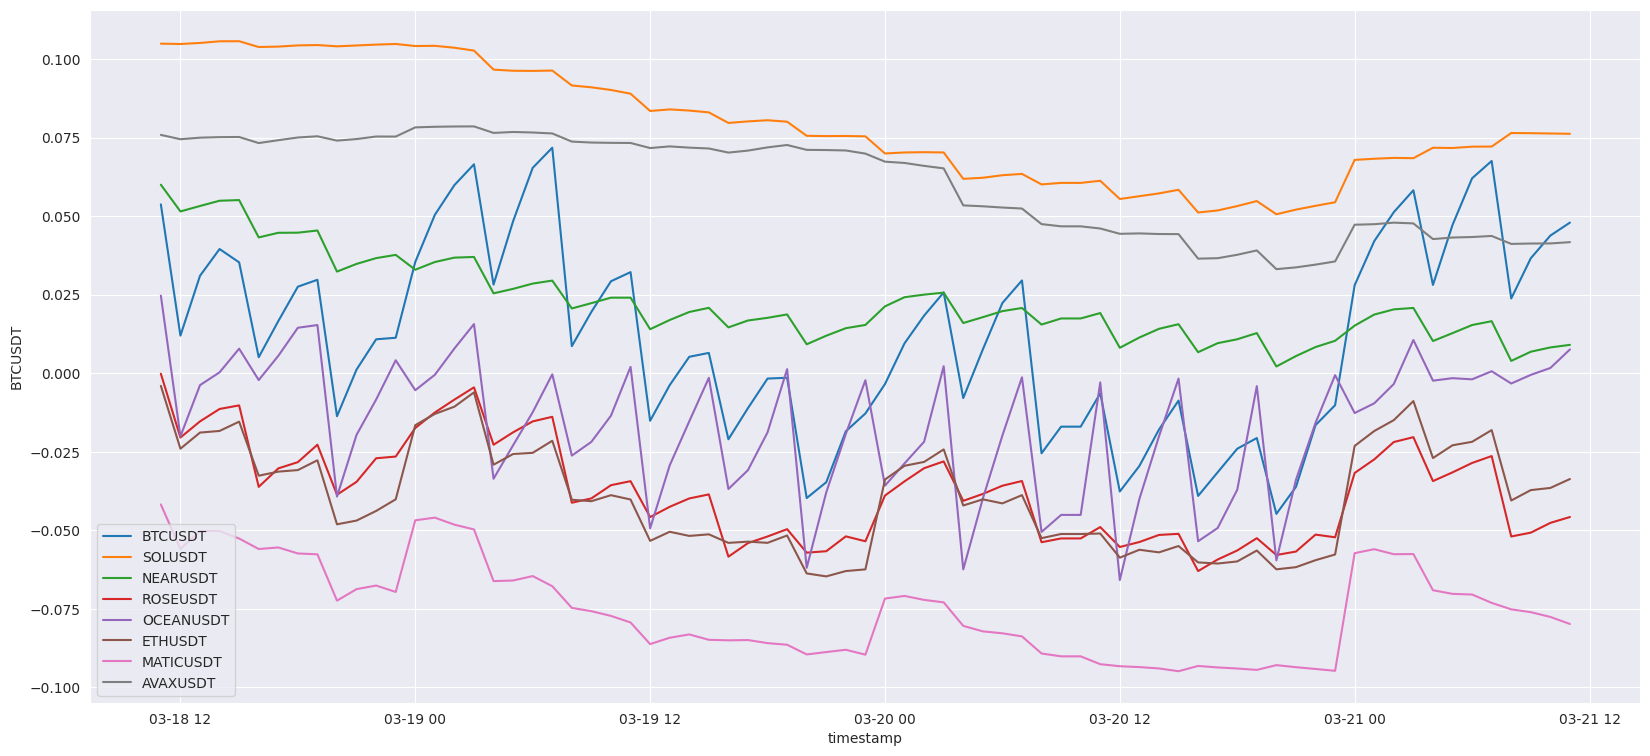

In [7]:
data = get_data('flat')
data = load_allos(data)
pairs = [p for p in data.columns if p != 'timestamp']
plt.figure(figsize=(20, 9))
for pair in pairs:
    sns.lineplot(data=data, x='timestamp', y=pair, label=pair)

lin length: 82


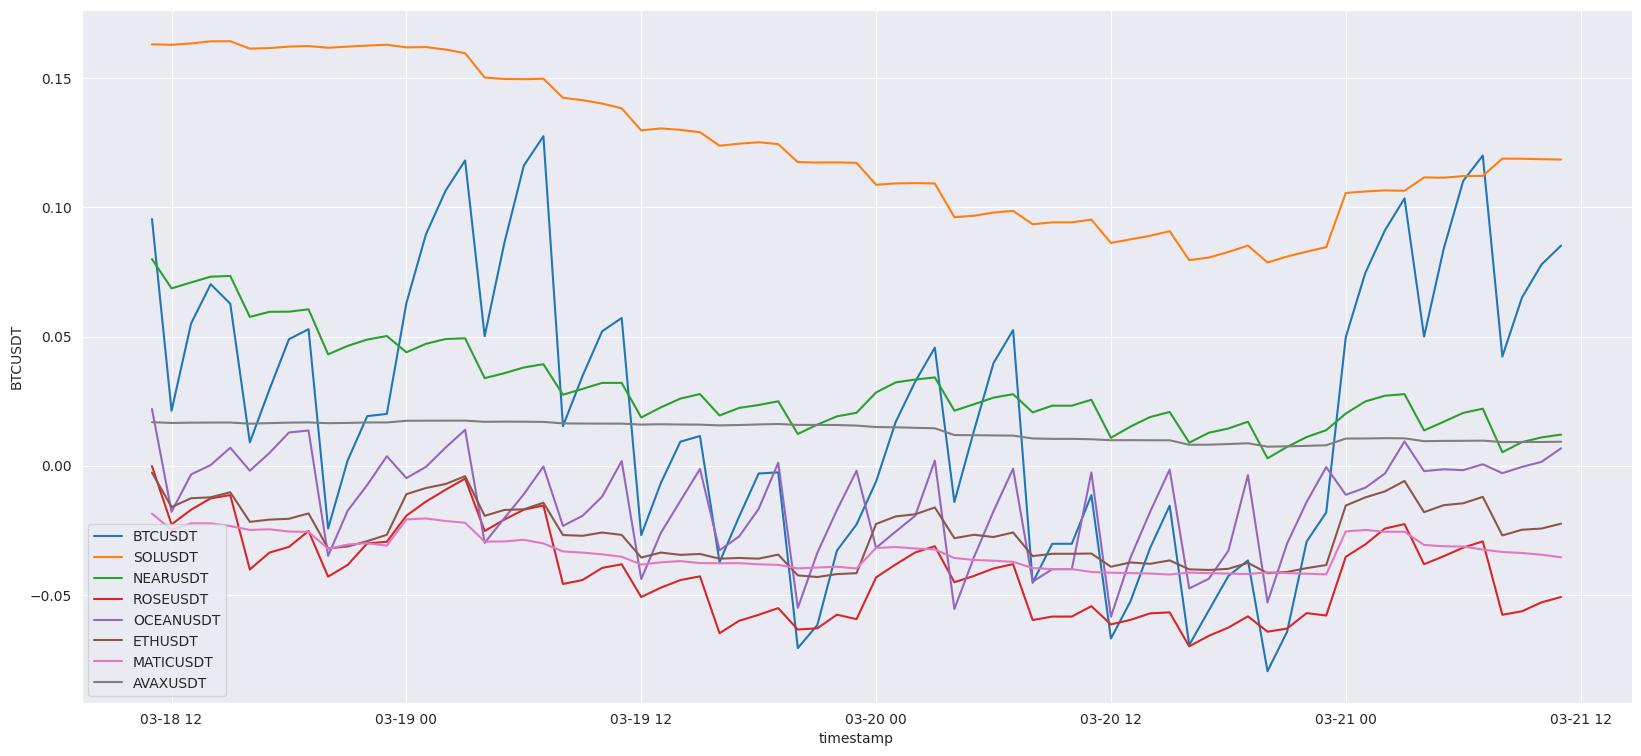

In [8]:
data = get_data('lin')
data = load_allos(data)
pairs = [p for p in data.columns if p != 'timestamp']
plt.figure(figsize=(20, 9))
for pair in pairs:
    sns.lineplot(data=data, x='timestamp', y=pair, label=pair)

perf length: 82


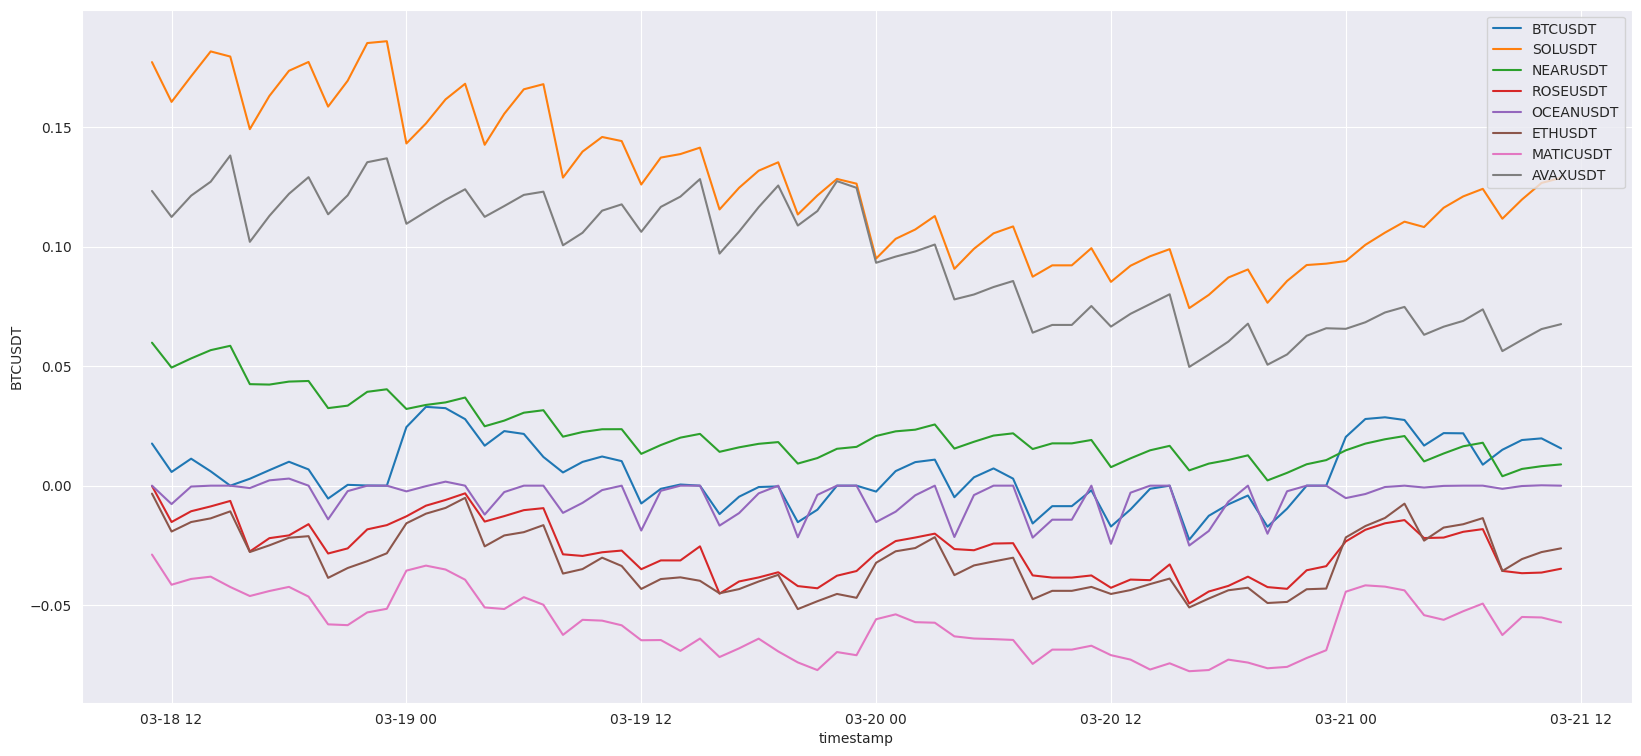

In [9]:
data = get_data('perf')
data = load_allos(data)
pairs = [p for p in data.columns if p != 'timestamp']
plt.figure(figsize=(20, 9))
for pair in pairs:
    sns.lineplot(data=data, x='timestamp', y=pair, label=pair)